In [1]:
import numpy as np
from Dataset import Neural_Data

neural_data = Neural_Data("/home/amy/Documents/Research/Makin/data/josh_data/TIMIT_wav_rescaled")

Data from 63 channels loaded...!


In [ ]:
# sents = [12,13,31,43,56,163,212,218,287,308]
# for sent in sents:
#     data = neural_data.retrieve_spikes_count_for_all_trials(12, w=100)
#     vals = []
#     for j in range(63):
#         channel = data[j]
#         cnt = 0
#         val = 0
#         for i in range(1000):
#             cnt+=1
#             rand_indices = np.random.randint(low=1, high=11, size=10)
#             a = np.mean(channel[rand_indices[:5],:], axis=0)
#             b = np.mean(channel[rand_indices[5:],:], axis=0)

#             a_var = np.var(a)

#             # print("a: ", a_var)
#             dist_square = np.sum((b-a)**2) / len(a)

#             val += (1-(dist_square/a_var))
#         # print(val, cnt)
#         vals.append(val/cnt)
#     plt.plot(vals)
#     plt.title(str(sent))
#     plt.show()
#     break
    

In [ ]:
# data = np.random.normal(0, 1, (10,5))
# data = neural_data.retrieve_spikes_count_for_all_trials(12, w=50)
# channel = data[3]


In [ ]:
# cnt = 0
# val = 0
# for i in range(1000):
#     cnt+=1
#     rand_indices = np.random.randint(low=0, high=11, size=10)
#     a = np.mean(channel[rand_indices[:5], :], axis=0)
#     b = np.mean(channel[rand_indices[5:], :], axis=0)

#     a_var = np.var(a)

#     # print("a: ", a_var)
#     dist_square = np.sum((b-a)**2) / len(a)

#     val += (1-(dist_square/a_var))
# print(val, cnt)
# val/cnt

In [ ]:
repeated_sents = {}
for i in range(499):
    data = neural_data.retrieve_spikes_count_for_all_trials(i, w=100)
    if data[1].shape[0] > 1:
        repeated_sents[i] = data[1].shape
print(repeated_sents)
        

In [ ]:
repeated_sents.keys()

In [35]:
from scipy import stats
import matplotlib.pyplot as plt
import csv
# print(channel.shape)

sents = [12,13,32,43,56,163,212,218,287,308]
# sents = [32]
# sent_vals = {}
# wins = [1,5,10,20,30,40,50,75,100,200]
wins = [1]
for w in wins:
    for sent in sents:
        data = neural_data.retrieve_spikes_count_for_all_trials(sent, w=w)
        # print(data.keys())
        channel_dict = {}
        for j in range(len(data)):
            channel = data[j]
            # print(channel.shape)
            cnt = 0
            val = []
            for shift in range(5, 11):
                for i in range(100):
                    rand_indices = np.random.randint(low=0, high=11, size=11)
                    cnt+=1.0
                    a = np.mean(channel[rand_indices[:10], :], axis=0)
                    # a = a - np.mean(a)
                    b = channel[rand_indices[10:], :]
                    b = np.roll(b, shift)
                    # b = b - np.mean(b)
                    res = stats.linregress(a, b)

                    val.append(res.rvalue**2)
                with open("/home/amy/Documents/Research/Makin/outputs/correlation/linreg_cs_win_"+ str(shift) + str(w)+ "_"+ str(sent) + ".csv", 'a') as f:
                    writer=csv.writer(f)
                    row = [j+1] + [sum(val)/cnt]
                    writer.writerow(row)
                    f.close()


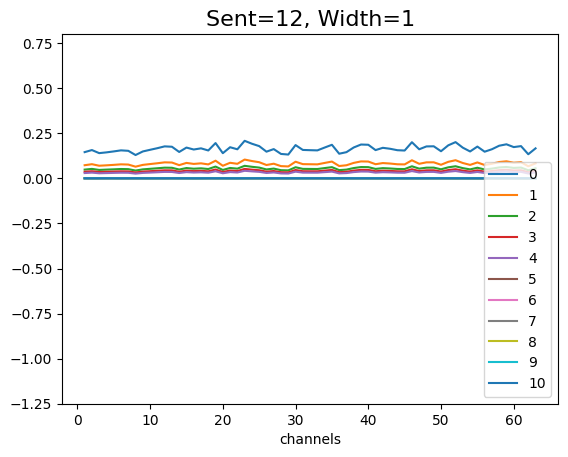

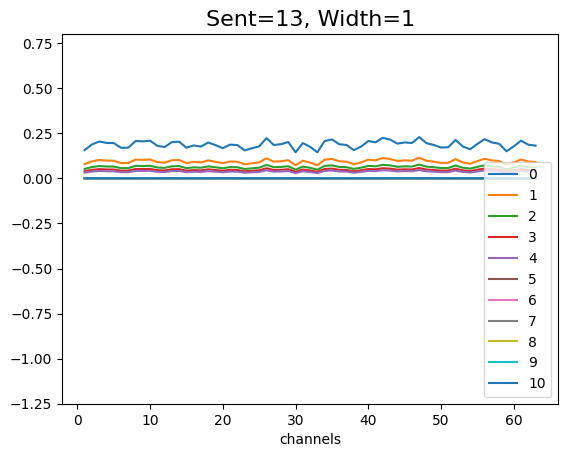

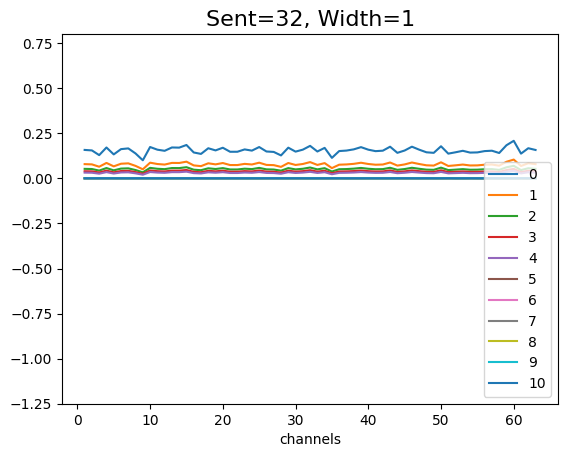

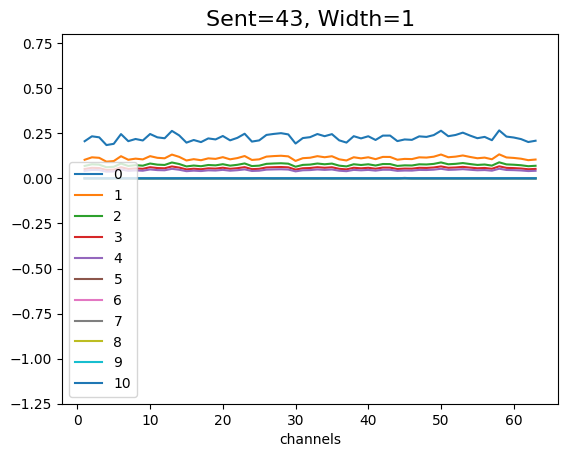

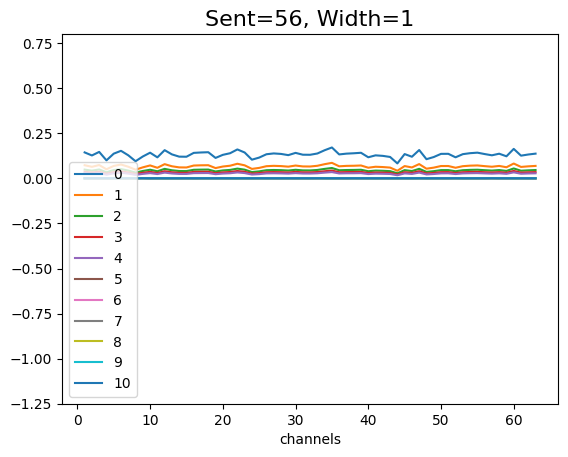

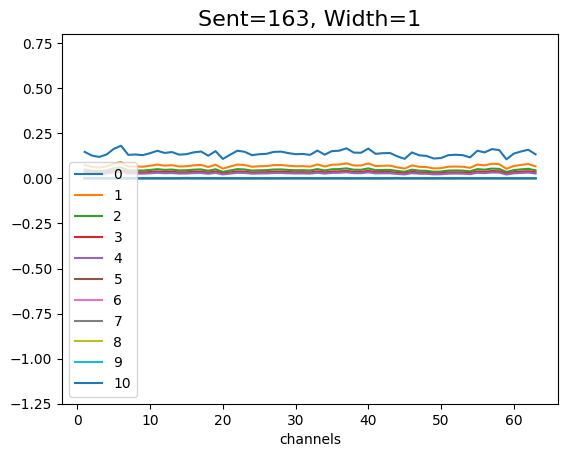

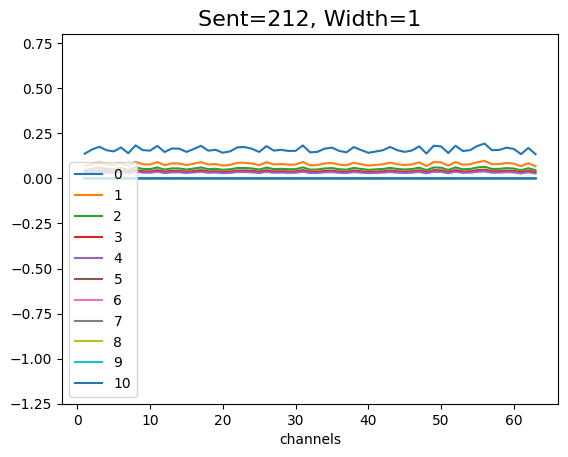

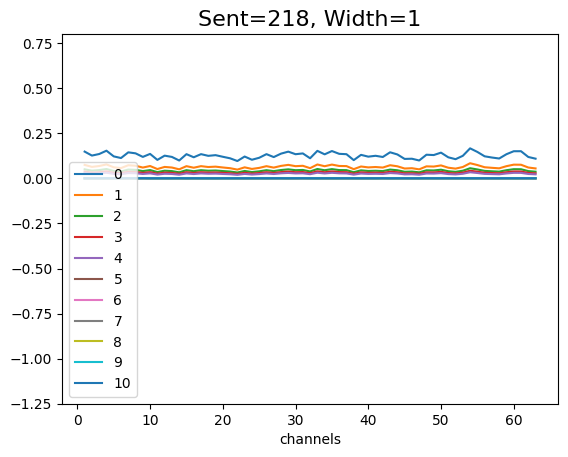

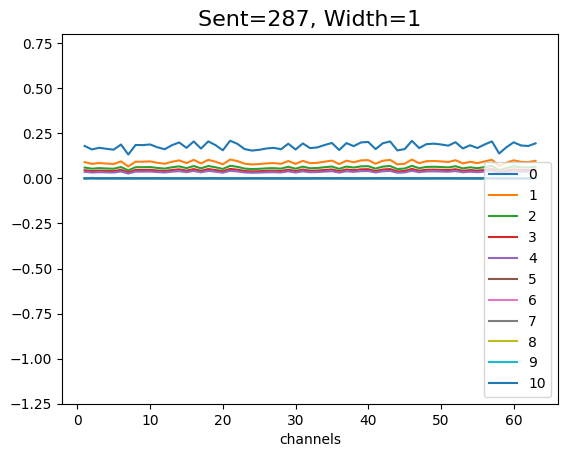

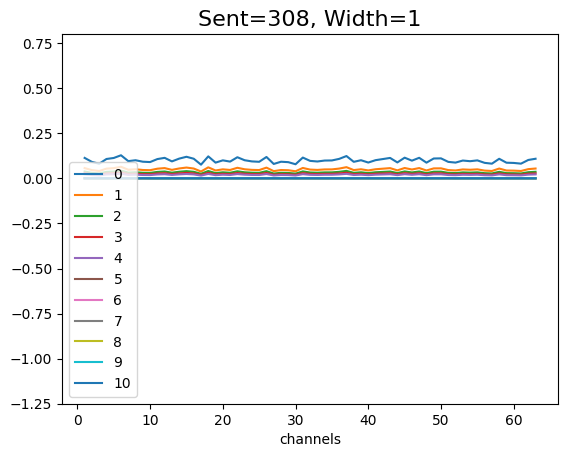

In [40]:
import pandas as pd
for w in wins:
    for sent in sents:
        plt.figure()
        for shift in range(11):
        # plt.figure()
            d = pd.read_csv("/home/amy/Documents/Research/Makin/outputs/correlation/linreg_cs_win_"+ str(shift) + str(w)+ "_"+ str(sent) + ".csv", header=None)
            d.columns = ["channels", "avg_r2"]

            avg_R2 = d['avg_r2'].to_list()
            channels = d['channels'].to_list()
            # plt.figure()
            plt.plot(channels, avg_R2, label=str(shift))
            plt.ylim(-1.25, 0.8)
        plt.xlabel("channels")
        plt.title("Sent="+str(sent)+", Width=" + str(w) , fontsize=16)
        plt.legend()
        # plt.savefig("/home/amy/Documents/Research/Makin/outputs/correlation/linreg_cs_win_" + str(w)+ ".png")
        plt.show()

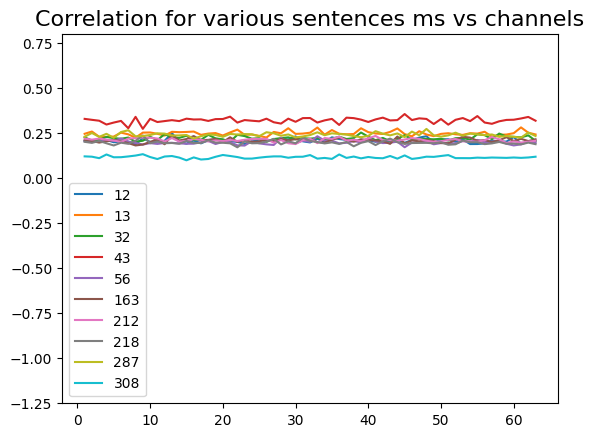

In [23]:
import pandas as pd

for sent in sents:
    d2 = pd.read_csv("/home/amy/Documents/Research/Makin/outputs/correlation/linreg_loo_win_ms40_"+ str(sent) +".csv", header=None)
    d2.columns = ["channels", "avg_r2"]

    avg_R2 = d2['avg_r2'].to_list()
    channels = d2['channels'].to_list()
    
    plt.plot(channels, avg_R2 ,label=str(sent))
    plt.ylim(-1.25, 0.8)
plt.title("Correlation for various sentences ms vs channels", fontsize=16)
plt.legend()
plt.show()

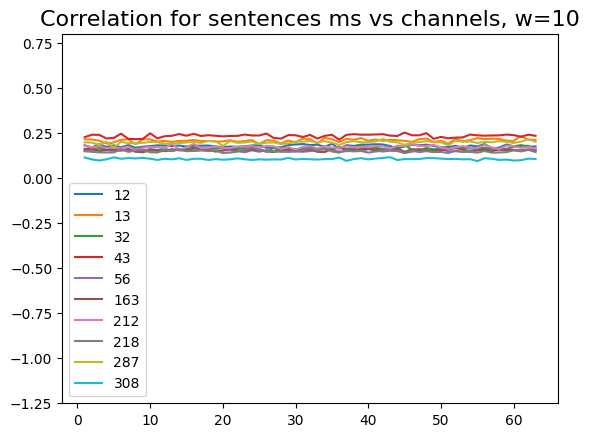

In [25]:
import pandas as pd

for sent in sents:
    d2 = pd.read_csv("/home/amy/Documents/Research/Makin/outputs/correlation/linreg_loo_win_ms10_"+ str(sent) +".csv", header=None)
    d2.columns = ["channels", "avg_r2"]

    avg_R2 = d2['avg_r2'].to_list()
    channels = d2['channels'].to_list()
    
    plt.plot(channels, avg_R2 ,label=str(sent))
    plt.ylim(-1.25, 0.8)
plt.title("Correlation for sentences ms vs channels, w=10", fontsize=16)
plt.legend()
plt.show()

In [23]:
import numpy as np

a = np.zeros(100)
b = np.zeros(100)
ind_a = np.random.randint(0,100,10)
ind_b = np.random.randint(0,100,10)

a[ind_a] = 1    
b[ind_b] = 1
res = stats.linregress(a,b)

res.rvalue**2

0.01234567901234568